In [78]:
import math as m
import matplotlib.pyplot as plt
import texttable
from biseccion import biseccion
from newton_raphson import newton_raphson, newton_raphson_mod
from punto_fijo import punto_fijo
from secante import secante

semilla_ant = 1013.5
semilla = 1106.75

tolerancia_grande = 10 ** -5

tolerancia_chica = 10 ** - 13

def f(x):
    return (0.001 * x * ((x - 1000) ** 2)) - 25000


def f_derivada(x):
    return 0.003 * (x ** 2) - (4 * x) + 1000


def f_derivada2(x):
    return (0.006 * x) - 4

def g(x):
    # g(x) utilizada para punto fijo
    return m.sqrt(25000 / (0.001 * x)) + 1000


def calcular_ordenes_de_convergencia(iteraciones, tolerancia):
    ordenes_de_convergencia = []
    for i in range(0, len(iteraciones)):
        if i < 3:
            ordenes_de_convergencia.append(0)
        else:
            error_n_plus_1 = abs(iteraciones[i] - iteraciones[i - 1])
            error_n = abs(iteraciones[i - 1] - iteraciones[i - 2])
            error_n_minus_1 = abs(iteraciones[i - 2] - iteraciones[i - 3])

            if error_n_plus_1 > tolerancia and error_n > tolerancia and error_n_minus_1 > tolerancia:
                numerator_log = m.log(error_n_plus_1 / error_n)
                denominator_log = m.log(error_n / error_n_minus_1)

                if not m.isclose(denominator_log, 0, rel_tol=tolerancia):
                    alfa = numerator_log / denominator_log
                    ordenes_de_convergencia.append(alfa)
                else:
                    ordenes_de_convergencia.append(ordenes_de_convergencia[-1])
            else:
                ordenes_de_convergencia.append(ordenes_de_convergencia[-1])
    return ordenes_de_convergencia


def calcular_constantes_asintoticas(iterations, alfa):
    constantes_asintoticas = []
    for i in range(0, len(iterations)):
        if i < 2:
            constantes_asintoticas.append(0)
        else:
            error_n_plus_1 = abs(iterations[i] - iterations[i - 1])
            error_n = abs(iterations[i - 1] - iterations[i - 2])
            constant = error_n_plus_1 / (error_n ** alfa)
            constantes_asintoticas.append(constant)
    return constantes_asintoticas


def dibujar_tablas(iteraciones, tolerancia):

    ordenes_de_convergencia = calcular_ordenes_de_convergencia(iteraciones, tolerancia)
    constantes_asintoticas = calcular_constantes_asintoticas(iteraciones, ordenes_de_convergencia[-1])

    construir_tabla(iteraciones, ordenes_de_convergencia, constantes_asintoticas)

    graph(ordenes_de_convergencia, "Grafico de ordenes de convergencia")
    graph(constantes_asintoticas, "Grafico de constantes asintoticas")

    grafico_log(iteraciones, tolerancia)

def construir_tabla(iteraciones, ordenes_de_convergencia, constantes_asintoticas):
    table = [["N° iteracion", "Punto", "P (Orden de Convergencia)", "Constante asintotica"]]
    for i in range(0, len(iteraciones)):
        if i <= 5 or i >= len(iteraciones) - 5:
            table.append([i, iteraciones[i], ordenes_de_convergencia[i], constantes_asintoticas[i]])

    l_table = texttable.Texttable()
    l_table.set_cols_align(["N° iteracion", "Punto", "P (Orden de Convergencia)", "Constante asintotica"])
    l_table.add_rows(table)
    print(l_table.draw())


def grafico_log(iteraciones, tolerancia):
    errores_con_log = []
    for i in range(1, len(iteraciones)):
        error = abs(iteraciones[i] - iteraciones[i - 1])
        if not m.isclose(error, 0, rel_tol=tolerancia):
            error = m.log(abs(iteraciones[i] - iteraciones[i - 1]))
            errores_con_log.append(error)

    plt.plot(errores_con_log)
    plt.grid()
    plt.title("Grafico log_10 vs iteraciones")
    plt.show()


def graph(puntos, titulo):
    plt.plot(puntos)
    plt.grid()
    plt.title(titulo)
    plt.show()


+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1013.500 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1106.750 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1153.375 | 0                         | 0.500                |
+--------------+----------+---------------------------+----------------------+
| 3            | 1130.062 | 1                         | 0.500                |
+--------------+----------+---------------------------+----------------------+
| 4            | 1141.719 | 1                         | 0.500                |
+--------------+----------+-------------------------

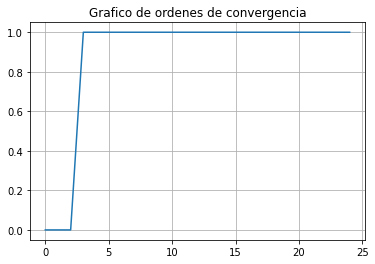

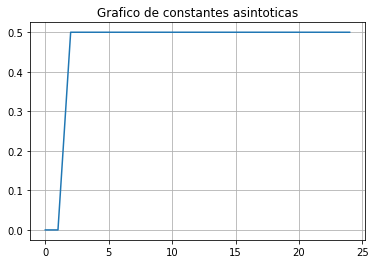

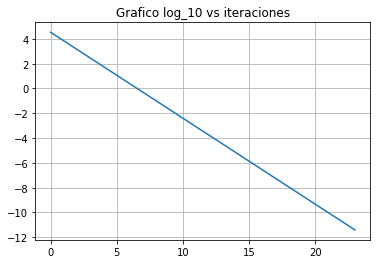

In [58]:
iteraciones = biseccion(f, 827, 1200, tolerancia_grande)
dibujar_tablas(iteraciones, tolerancia_grande)

Estos graficos son los esperados en base a la teoria, sabemos que el metodo de biseccion tiene ${\alpha = 1}$ y ${\lambda < 1 }$ al ser linealmente convergente, eso se puede observar claramente en el grafico

Observamos que en el grafico de logaritmo la diferencia entre cada iteracion va decreciendo linealmente

+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1013.500 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1106.750 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1153.375 | 0                         | 46.625               |
+--------------+----------+---------------------------+----------------------+
| 3            | 1130.062 | 1                         | 23.312               |
+--------------+----------+---------------------------+----------------------+
| 4            | 1141.719 | 1                         | 11.656               |
+--------------+----------+-------------------------

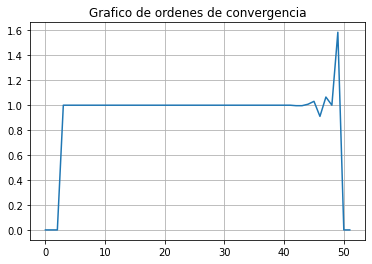

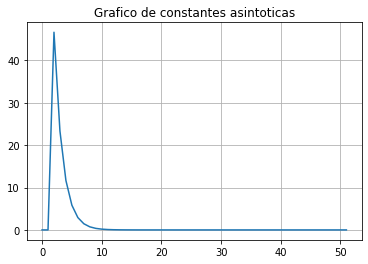

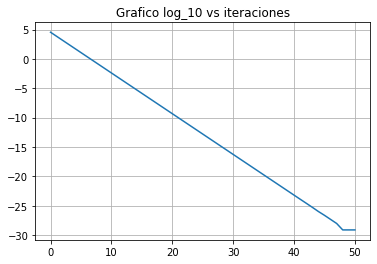

In [67]:
iteraciones = biseccion(f, 827, 1200, tolerancia_chica)

dibujar_tablas(iteraciones, tolerancia_chica)

6
+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1106.750 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1156.765 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1147.913 | 0                         | 0.003                |
+--------------+----------+---------------------------+----------------------+
| 3            | 1147.597 | 1.923                     | 0.004                |
+--------------+----------+---------------------------+----------------------+
| 4            | 1147.596 | 2.003                     | 0.004                |
+--------------+----------+-----------------------

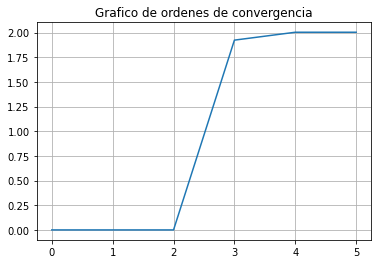

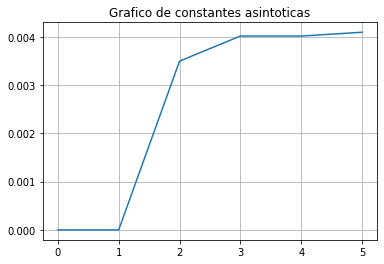

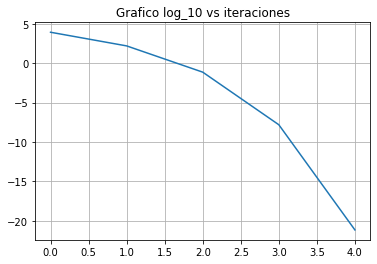

In [63]:
iteraciones = newton_raphson(f, f_derivada, semilla, tolerancia_grande)

dibujar_tablas(iteraciones, tolerancia_grande)

Estos graficos tambien coinciden con la teoria, vemos que el orden de convergencia tiende a 2, la cual es el orden de convergencia del metodo Newton-Raphson.

Observamos en el grafico ${log_{10}}$, la diferencia entre iteraciones consecutivas decrece cuadraticamente, coincidiendo con el orden de convergencia

+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1106.750 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1156.765 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1147.913 | 0                         | 0.004                |
+--------------+----------+---------------------------+----------------------+
| 3            | 1147.597 | 1.923                     | 0.004                |
+--------------+----------+---------------------------+----------------------+
| 4            | 1147.596 | 2.003                     | 0.004                |
+--------------+----------+-------------------------

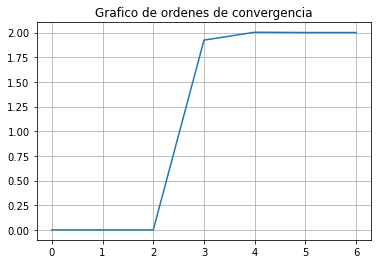

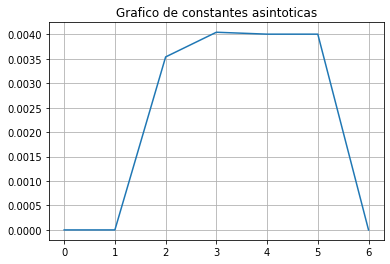

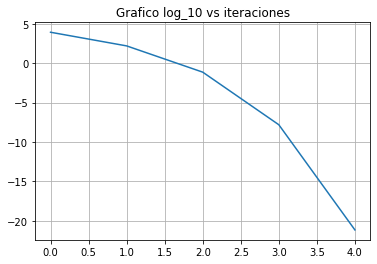

In [64]:
iteraciones = newton_raphson(f, f_derivada, semilla, tolerancia_chica)

dibujar_tablas(iteraciones, tolerancia_chica)

+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1106.750 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1139.371 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1147.314 | 0                         | 0.007                |
+--------------+----------+---------------------------+----------------------+
| 3            | 1147.596 | 2.362                     | 0.004                |
+--------------+----------+---------------------------+----------------------+
| 4            | 1147.596 | 2.032                     | 0.004                |
+--------------+----------+-------------------------

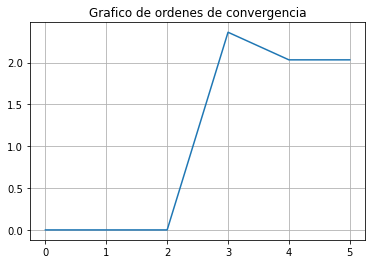

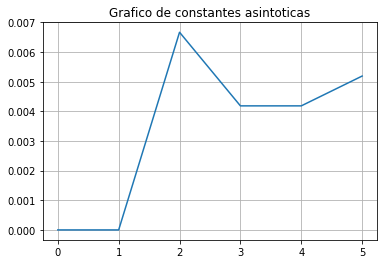

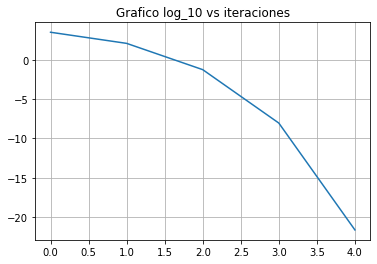

In [65]:
iteraciones = newton_raphson_mod(f, f_derivada, f_derivada2, semilla, tolerancia_grande)

dibujar_tablas(iteraciones, tolerancia_grande)

Observamos algo similar al grafico del metodo de Newton-Raphson, esto puede ser debido a un error de la estimacion del orden de convergencia

+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1106.750 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1139.371 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1147.314 | 0                         | 0.007                |
+--------------+----------+---------------------------+----------------------+
| 3            | 1147.596 | 2.362                     | 0.004                |
+--------------+----------+---------------------------+----------------------+
| 4            | 1147.596 | 2.032                     | 0.004                |
+--------------+----------+-------------------------

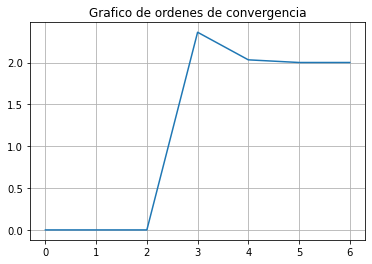

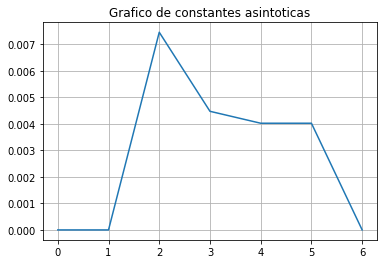

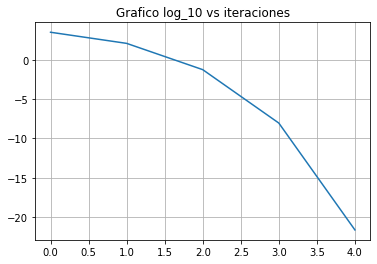

In [66]:
iteraciones = newton_raphson_mod(f, f_derivada, f_derivada2, semilla, tolerancia_chica)

dibujar_tablas(iteraciones, tolerancia_chica)

+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1013.500 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1199.705 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1110.448 | 0                         | 0.037                |
+--------------+----------+---------------------------+----------------------+
| 3            | 1140.253 | 1.492                     | 0.037                |
+--------------+----------+---------------------------+----------------------+
| 4            | 1148.876 | 1.131                     | 0.055                |
+--------------+----------+-------------------------

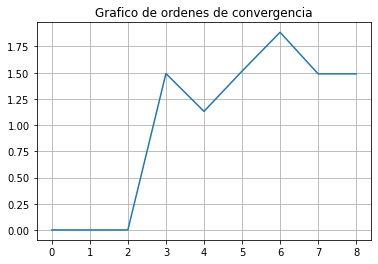

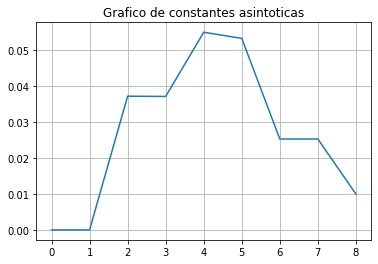

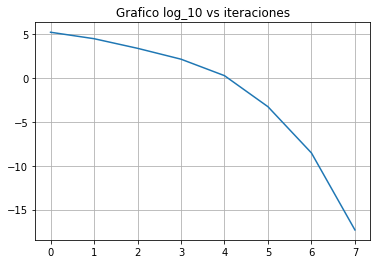

In [72]:
iteraciones = secante(f, semilla, semilla_ant, tolerancia_grande)

dibujar_tablas(iteraciones, tolerancia_grande)

Observamos que el metodo de la secante tiene un orden de convergencia supralineal ya que ${\alpha}$ varia entre 1 y 2

+--------------+----------+---------------------------+----------------------+
| N° iteracion |  Punto   | P (Orden de Convergencia) | Constante asintotica |
+==============+==========+===========================+======================+
| 0            | 1013.500 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 1            | 1199.705 | 0                         | 0                    |
+--------------+----------+---------------------------+----------------------+
| 2            | 1110.448 | 0                         | 0.015                |
+--------------+----------+---------------------------+----------------------+
| 3            | 1140.253 | 1.492                     | 0.017                |
+--------------+----------+---------------------------+----------------------+
| 4            | 1148.876 | 1.131                     | 0.030                |
+--------------+----------+-------------------------

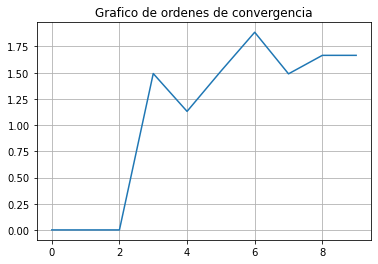

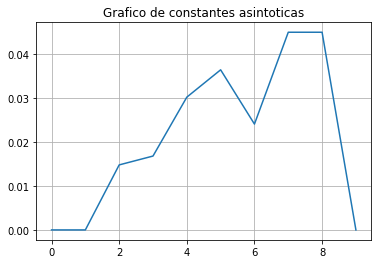

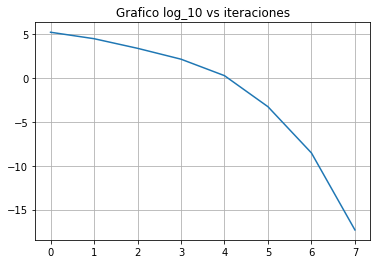

In [73]:
iteraciones = secante(f, semilla, semilla_ant, tolerancia_chica)

dibujar_tablas(iteraciones, tolerancia_chica)

In [79]:
iteraciones = punto_fijo(g, semilla, tolerancia_grande)

dibujar_tablas(iteraciones, tolerancia_grande)

ZeroDivisionError: float division by zero